<a href="https://colab.research.google.com/github/701KHK1915/01_DATA_SCIENCE_NOTEBOOKS/blob/main/statistics_assigment_5(Hypotesis_test).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

EXERCISE 1. 
The hourly wages in a particular industry are normally distributed 
with mean $13.20 and standard deviation $2.50. A company in this industry employs 40 workers, paying them an 
average of $12.20 per hour. Can this company be accused of paying substandard wages? Use an α = .01 level test. 
(Wackerly, Ex.10.18)

CHECK: statistic: -2.5298221281347035, pvalue= 0.005706018193000826



In [2]:
n=40
mu=13.20
sigma=2.50
mux=12.20
alpha=0.01

In [5]:
H0 : mu = mux
H1 :mu < mux    

In [4]:
z_score=(mu-mux)/(sigma/np.sqrt(40))
z_score

2.5298221281347035

In [6]:
#left tail= -2.52

In [7]:
upper = 1-stats.norm.cdf(z_score)
upper

0.005706018193000872

In [8]:
alpha = 0.01
if upper < alpha :
    print("Reject the null")
else :
    print("Fail to reject the null")

Reject the null


EXERCISE 2.
Shear strength measurements derived from unconfined compression tests for two types of soils 
gave the results shown in the following document (measurements in tons per square foot). 
Do the soils appear to differ with respect to average shear strength, at the 1% significance level?

Results for two type of soils

CHECK: statistic: 5.1681473319343345, pvalue= 2.593228732352821e-06

In [11]:
df = pd.read_excel("soil.xlsx")
df

,Soil1,Soil2
0,1.442,1.364
1,1.943,1.878
2,1.110,1.337
3,1.912,1.828
4,1.553,1.371
5,1.641,1.428
6,1.499,1.119
7,1.347,1.373
8,1.685,1.589
9,1.578,1.714


In [ ]:
df.Soil1.isna().sum()

5

In [12]:
df.Soil2.isna().sum()

0

In [13]:
df.Soil1.mean()

1.6918

In [14]:
df.Soil2.mean()

1.4171142857142855

In [15]:
# H0 : mu1=mu2
# H1 : mu1!= mu2

In [16]:
leveneTest = stats.levene(df.dropna()['Soil1'],df['Soil2'])
leveneTest

LeveneResult(statistic=0.31486292982090475, pvalue=0.5767018253541134)

In [17]:
#We can say that H0 rejected and two groups different variance

In [18]:
IndTest = stats.ttest_ind(df.dropna()['Soil1'],df['Soil2'],equal_var=True)
#if variance nor equal
IndTest

Ttest_indResult(statistic=5.1681473319343345, pvalue=2.593228732352821e-06)

In [19]:
alpha = 0.01

if IndTest.pvalue < alpha:
    print("Reject the null")
else:
    print("Fail to reject the null")

Reject the null


EXERCISE 3.
The following dataset is based on data provided by the World Bank 
(https://datacatalog.worldbank.org/dataset/education-statistics). 
World Bank Edstats.  2015 PISA Test Dataset

Get descriptive statistics (the central tendency, dispersion and shape of a dataset’s 
                            distribution) for each continent group (AS, EU, AF, NA, SA, OC).
Determine whether there is any difference (on the average) for the math scores among 
European (EU) and Asian (AS) countries (assume normality and equal variances). 

Draw side-by-side box plots.
CHECK: statistic=0.870055317967983, pvalue=0.38826888111307345

In [20]:
df1 = pd.read_excel("2015 PISA Test.xlsx")
df1

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
0,ALB,EU,63.252933,413.1570,405.2588,427.2250
1,ARE,AS,90.500000,427.4827,433.5423,436.7311
2,ARG,SA,68.043064,409.0333,425.3031,432.2262
3,AUS,OC,84.560519,493.8962,502.9006,509.9939
4,AUT,EU,83.940142,496.7423,484.8656,495.0375
...,...,...,...,...,...,...
65,TUN,AF,48.519836,366.8180,361.0555,386.4034
66,TUR,EU,53.744979,420.4540,428.3351,425.4895
67,URY,SA,64.600000,417.9919,436.5721,435.3630
68,USA,NaN,74.554202,469.6285,496.9351,496.2424


In [21]:
df1.describe()

,internet_users_per_100,Math,Reading,Science
count,70.000000,70.000000,70.000000,70.000000
mean,71.973099,460.971557,460.997291,465.439093
std,16.390632,53.327205,49.502679,48.397254
min,21.976068,327.702000,346.549000,331.638800
25%,60.899020,417.416075,426.948625,425.923375
50%,72.999350,477.607150,480.199850,475.400050
75%,85.026763,500.482925,499.687475,502.431250
max,98.200000,564.189700,535.100200,555.574700


In [22]:
df1.groupby("Continent_Code").mean()

,internet_users_per_100,Math,Reading,Science
Continent_Code,,,,
AF,43.359918,363.212100,355.457400,381.074250
AS,68.455613,466.216647,454.059682,467.945847
EU,77.274888,477.981449,476.164608,478.299381
OC,86.391704,494.559750,506.085650,511.648700
SA,60.180494,402.887700,425.359229,421.747186


In [23]:
df1.groupby("Continent_Code").median()

,internet_users_per_100,Math,Reading,Science
Continent_Code,,,,
AF,43.359918,363.21210,355.45740,381.07425
AS,74.000000,459.81600,433.54230,456.48360
EU,76.184000,489.72870,487.25010,490.22500
OC,86.391704,494.55975,506.08565,511.64870
SA,64.289000,409.03330,425.30310,424.59050


In [24]:
df1.groupby("Continent_Code").std()

,internet_users_per_100,Math,Reading,Science
Continent_Code,,,,
AF,7.297226,5.099513,7.916909,7.536556
AS,21.086060,64.356490,57.048962,56.671371
EU,12.425773,35.150403,37.720545,34.450616
OC,2.589686,0.938401,4.504341,2.340241
SA,9.772455,18.128894,19.709688,18.470319


In [25]:
df1.groupby("Continent_Code").var()

,internet_users_per_100,Math,Reading,Science
Continent_Code,,,,
AF,53.249507,26.005030,62.677447,56.799679
AS,444.621918,4141.757822,3254.584049,3211.644321
EU,154.399841,1235.550805,1422.839540,1186.844969
OC,6.706475,0.880597,20.289087,5.476726
SA,95.500869,328.656783,388.471816,341.152678


In [26]:
df1.groupby("Continent_Code").skew()

/usr/local/lib/python3.7/dist-packages/pandas/core/groupby/groupby.py:937: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return f(x, *args, **kwargs)


,internet_users_per_100,Math,Reading,Science
Continent_Code,,,,
AF,NaN,NaN,NaN,NaN
AS,-0.775229,0.144656,-0.099169,0.135810
EU,-0.049351,-1.245494,-1.325443,-0.881399
OC,NaN,NaN,NaN,NaN
SA,-1.469258,-0.372256,0.325499,-0.207071


In [27]:
dfmath=df1.groupby("Continent_Code").describe()['Math']
dfmath

,count,mean,std,min,25%,50%,75%,max
Continent_Code,,,,,,,,
AF,2.0,363.212100,5.099513,359.6062,361.409150,363.21210,365.015050,366.8180
AS,17.0,466.216647,64.356490,380.2590,403.833200,459.81600,531.296100,564.1897
EU,37.0,477.981449,35.150403,371.3114,464.040100,489.72870,503.722000,521.2506
OC,2.0,494.559750,0.938401,493.8962,494.227975,494.55975,494.891525,495.2233
SA,7.0,402.887700,18.128894,377.0695,388.102200,409.03330,417.617650,422.6714


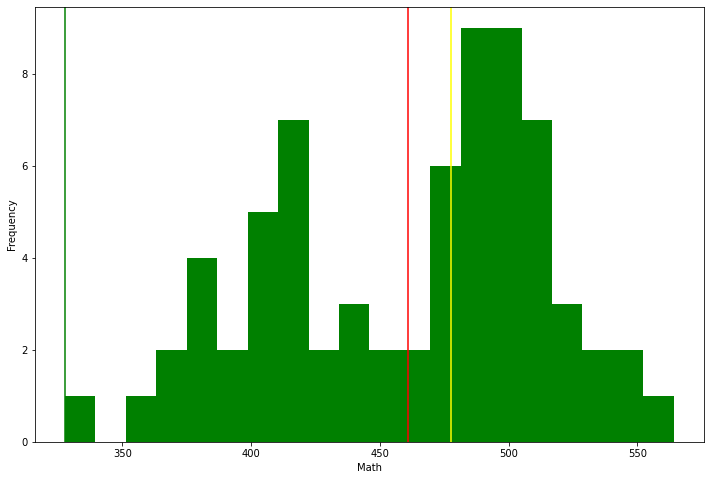

In [31]:
#Math
mean = df1.Math.mean()
median = df1.Math.median()
mode = df1.Math.mode()

plt.figure(figsize=(12,8))
plt.hist(df1.Math,bins=20,color='green')
plt.axvline(mean,color='red',label='Mean')
plt.axvline(median,color='yellow',label='Median')
plt.axvline(mode[0],color='green',label='Mode')
plt.xlabel('Math')
plt.ylabel('Frequency')
plt.show()

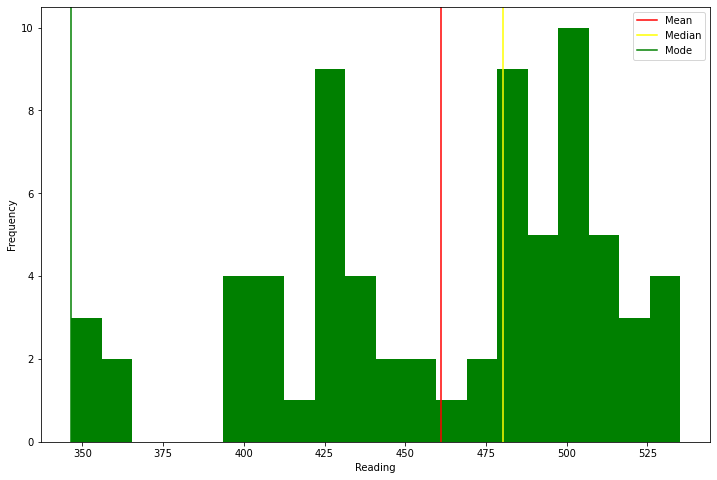

In [32]:
#Reading
mean = df1.Reading.mean()
median = df1.Reading.median()
mode = df1.Reading.mode()

plt.figure(figsize=(12,8))
plt.hist(df1.Reading,bins=20,color='green')
plt.axvline(mean,color='red',label='Mean')
plt.axvline(median,color='yellow',label='Median')
plt.axvline(mode[0],color='green',label='Mode')
plt.xlabel('Reading')
plt.ylabel('Frequency')
plt.legend()
plt.show()

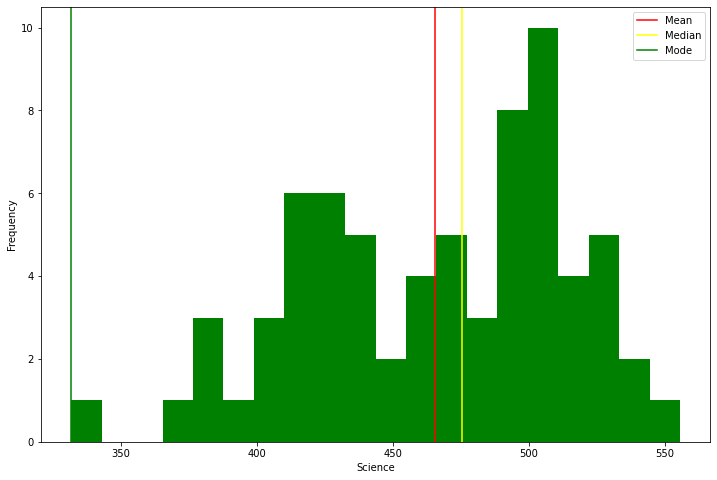

In [33]:
#Science
mean = df1.Science.mean()
median = df1.Science.median()
mode = df1.Science.mode()

plt.figure(figsize=(12,8))
plt.hist(df1.Science,bins=20,color='green')
plt.axvline(mean,color='red',label='Mean')
plt.axvline(median,color='yellow',label='Median')
plt.axvline(mode[0],color='green',label='Mode')
plt.xlabel('Science')
plt.ylabel('Frequency')
plt.legend()

plt.show()

In [34]:
df1[(df1['Continent_Code'] == "AS") | (df1['Continent_Code'] == "EU")][['Math','Continent_Code']]

,Math,Continent_Code
0,413.1570,EU
1,427.4827,AS
4,496.7423,EU
5,506.9844,EU
6,441.1899,EU
9,521.2506,EU
11,531.2961,AS
14,437.1443,EU
15,492.3254,EU
16,505.9713,EU


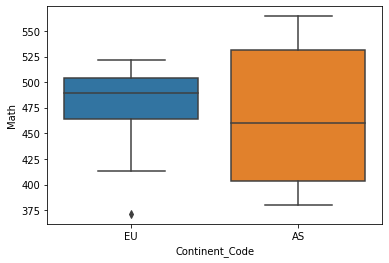

In [35]:
sns.boxplot(y='Math', x='Continent_Code', data = df1[(df1['Continent_Code'] == "AS") | (df1['Continent_Code'] == "EU")][['Math','Continent_Code']]);

In [36]:
EU = df1[df1['Continent_Code'] == "EU"]['Math']
EU

0     413.1570
4     496.7423
5     506.9844
6     441.1899
9     521.2506
14    437.1443
15    492.3254
16    505.9713
17    511.0876
20    485.8432
21    519.5291
22    511.0769
23    492.9204
24    492.4785
26    453.6299
28    464.0401
29    476.8309
31    503.7220
32    488.0332
34    489.7287
40    478.3834
41    485.7706
42    482.3051
44    419.6635
46    371.3114
47    478.6448
48    417.9341
50    512.2528
51    501.7298
54    504.4693
55    491.6270
57    443.9543
58    494.0600
60    475.2301
61    509.9196
62    493.9181
66    420.4540
Name: Math, dtype: float64

In [37]:
AS = df1[df1['Continent_Code'] == "AS"]['Math']
AS

1     427.4827
11    531.2961
25    403.8332
27    547.9310
30    386.1096
33    469.6695
35    380.2590
36    532.4399
37    459.8160
38    524.1062
39    396.2497
43    543.8078
49    446.1098
56    402.4007
59    564.1897
63    415.4638
69    494.5183
Name: Math, dtype: float64

In [38]:
#H0 : mu1=mu2
#H1 : mu1!mu2

In [39]:
indTest = stats.ttest_ind(EU, AS,equal_var=True)
indTest

Ttest_indResult(statistic=0.8700553179679787, pvalue=0.38826888111307556)

In [40]:
alpha = 0.05

if indTest.pvalue < alpha:
    print("Reject the null")
else:
    print("Fail to reject the null")

Fail to reject the null


EXERCISE 4.The sample dataset has placement test scores (out of 100 points) for four subject areas: 
    English, Reading, Math, and Writing. Students in the sample completed all 4 placement tests 
    when they enrolled in the university. Suppose we are particularly interested in the English and 
    Math sections, and want to determine whether students tended to score higher on their English or Math 
    test, on average. We could use a paired t test to test if there was a significant difference in
    the average of the two tests.

Sample Dataset 2014

CHECK: statistic=36.312568981719856, pvalue=3.0710987192210606e-128

In [41]:
df3 = pd.read_excel("students_2014.xlsx")
df3.head()

,ids,bday,enrolldate,expgradate,Rank,Major,Gender,Athlete,Height,Weight,Smoking,Sprint,MileMinDur,English,Reading,Math,Writing,State,LiveOnCampus,HowCommute,CommuteTime,SleepTime,StudyTime
0,43783.0,1995-03-22,NaT,NaT,NaN,NaN,0.0,0.0,72.35,NaN,0.0,7.978,NaN,88.24,81.50,60.02,81.44,In state,1.0,NaN,NaN,7.0,1.0
1,20278.0,1995-01-01,NaT,NaT,NaN,Philosophy,0.0,0.0,70.66,179.20,0.0,8.004,00:06:21,89.45,85.25,70.19,73.27,NaN,1.0,NaN,NaN,5.0,2.0
2,20389.0,1994-12-31,NaT,NaT,NaN,NaN,0.0,0.0,70.68,198.52,0.0,NaN,00:07:00,96.73,86.88,71.20,84.24,In state,NaN,NaN,NaN,8.0,7.0
3,22820.0,1994-12-01,NaT,NaT,NaN,business administration,1.0,0.0,NaN,198.34,NaN,8.473,00:12:44,74.06,88.68,55.89,73.16,In state,1.0,NaN,NaN,2.0,6.0
4,24559.0,1994-11-10,NaT,NaT,NaN,NaN,1.0,1.0,67.43,128.17,2.0,NaN,00:06:25,82.61,77.30,65.52,80.45,Out of state,1.0,NaN,NaN,7.0,3.0


In [42]:
df3.isnull().sum()

ids               0
bday              8
enrolldate       29
expgradate       29
Rank             29
Major           159
Gender            9
Athlete           0
Height           27
Weight           59
Smoking          24
Sprint           61
MileMinDur       43
English          26
Reading          10
Math             13
Writing          31
State            27
LiveOnCampus     21
HowCommute      188
CommuteTime     188
SleepTime        32
StudyTime        42
dtype: int64

In [43]:
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
ids,435.0,35279.022989,8637.733605,20183.000,28001.0000,35350.000,42655.5000,49947.000
Rank,406.0,2.199507,1.098641,1.000,1.0000,2.000,3.0000,4.000
Gender,426.0,0.521127,0.500141,0.000,0.0000,1.000,1.0000,1.000
Athlete,435.0,0.422989,0.494602,0.000,0.0000,0.000,1.0000,1.000
Height,408.0,68.031765,5.325655,55.000,64.8275,67.570,71.5750,84.410
Weight,376.0,181.031569,42.749680,101.710,153.8600,172.960,204.3075,350.070
Smoking,411.0,0.430657,0.766324,0.000,0.0000,0.000,1.0000,2.000
Sprint,374.0,6.581933,1.227069,4.503,5.5875,6.569,7.4580,9.597
English,409.0,82.787555,6.839803,59.830,78.3300,83.150,87.1700,101.950
Reading,425.0,82.070800,7.661778,55.110,77.1900,81.940,87.0800,103.620


In [44]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ids           435 non-null    float64       
 1   bday          427 non-null    datetime64[ns]
 2   enrolldate    406 non-null    datetime64[ns]
 3   expgradate    406 non-null    datetime64[ns]
 4   Rank          406 non-null    float64       
 5   Major         276 non-null    object        
 6   Gender        426 non-null    float64       
 7   Athlete       435 non-null    float64       
 8   Height        408 non-null    float64       
 9   Weight        376 non-null    float64       
 10  Smoking       411 non-null    float64       
 11  Sprint        374 non-null    float64       
 12  MileMinDur    392 non-null    object        
 13  English       409 non-null    float64       
 14  Reading       425 non-null    float64       
 15  Math          422 non-null    float64   

In [47]:
#H0 : avg=0
#H1 : avg!=0(math_avg-english_avg)

In [46]:
pairedtest = stats.ttest_rel(df3.Math, df3.English, nan_policy='omit',alternative='two-sided')
pairedtest

TypeError: ignored

In [48]:
#There was a significant average difference between English and Math 
#scores(value= 3.071098719220689e-128, p < 0.001))
